In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import inspect
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import re

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# Reflect the database into the Base variable (a class)
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()  # Display the list of tables in the DB

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [38]:
inspect(Measurement).local_table

Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

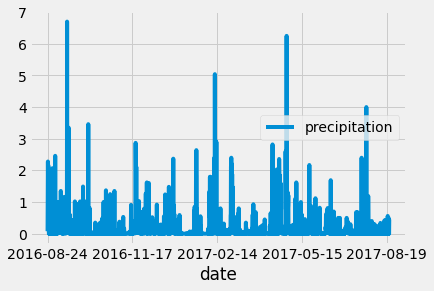

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
last_measurement = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()
last_measurement = dt.datetime.strptime(last_measurement[0][0], '%Y-%m-%d')
#last_measurement

# Calculate the date one year from the last date in data set.
prev_year = last_measurement - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
results_df.dropna(inplace=True)
results_df.set_index(results_df['date'], inplace=True)
#results_df.drop('date', axis=1, inplace=True)
results_df.sort_index(inplace=True)
#results_df
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot()

In [88]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [94]:
# How many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [95]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Choose the station with the highest number of temperature observations.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#session.query(Measurement.date, Measurement.station, Measurement.prcp).filter(Measurement.station == 'USC00519281').all()
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(85.0, 54.0, 71.66378066378067)]

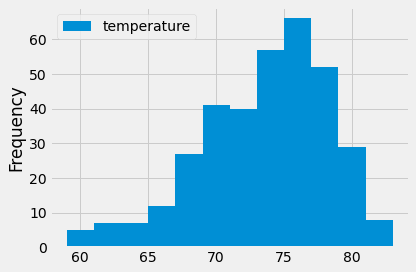

In [109]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
temp_results_df = pd.DataFrame(temp_results, columns = ['date', 'temperature'])
temp_results_df.dropna(inplace=True)
temp_results_df.set_index(temp_results_df['date'], inplace=True)
temp_results_df.sort_index()
temp_results_df.plot.hist(bins=12)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge